<a href="https://colab.research.google.com/github/sahilfaizal01/FMCG-Shopper-Analytics-Unveiling-Customer-Trends/blob/main/Purchase_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **Reading the dataset**

In [372]:
df = pd.read_csv('/content/drive/MyDrive/Customer-Analytics/purchase data.csv')

# **Exploring the dataset**

In [373]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [374]:
df.shape # checking the shape of the dataframe

(58693, 24)

In [375]:
df.info() # checking data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [376]:
df.isnull().sum() # no null values

,0
ID,0
Day,0
Incidence,0
Brand,0
Quantity,0
Last_Inc_Brand,0
Last_Inc_Quantity,0
Price_1,0
Price_2,0
Price_3,0


# We can't use descriptive statistics because we don't have equal number of records per customer or an equal number of records per day

# **Importing Segmentation Models**

In [377]:
scaler = pickle.load(open('/content/scaler.pkl','rb'))

In [378]:
pca = pickle.load(open('/content/drive/MyDrive/Customer-Analytics/pca.pkl','rb'))

In [379]:
kmeans_pca = pickle.load(open('/content/drive/MyDrive/Customer-Analytics/kmeans_pca.pkl','rb'))

# **Standardization**

In [380]:
features = df[['Sex','Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

# **PCA**

In [381]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

## customers appear on more than one transaction resulting in some duplicates in the PCA

# **K-means PCA**

In [382]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [383]:
df_purchase_predictors = df.copy()
df_purchase_predictors['Segments'] = purchase_segm_kmeans_pca

# **Descriptive Analysis by Segments**

# Data Analysis by Customer

In [384]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3


In [385]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [386]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence':'N_Purchases'})
temp2.head()

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [387]:
temp3 = temp1.join(temp2)

In [388]:
temp3

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [389]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [390]:
temp4 = df_purchase_predictors[['ID','Segments']].groupby(['ID'],as_index=False).mean()
temp4 = temp4.set_index('ID')
temp4.head()

,Segments
ID,
200000001,3.0
200000002,2.0
200000003,3.0
200000004,3.0
200000005,1.0


In [391]:
df_purchase_descrp = temp3.join(temp4)

In [392]:
df_purchase_descrp

,N_Visits,N_Purchases,Average_N_Purchases,Segments
ID,,,,
200000001,101,9,0.089109,3.0
200000002,87,11,0.126437,2.0
200000003,97,10,0.103093,3.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,1.0
...,...,...,...,...
200000496,120,20,0.166667,0.0
200000497,120,43,0.358333,3.0
200000498,131,39,0.297710,0.0


# **Segment Proportions**

In [393]:
segm_proportions = df_purchase_descrp[['N_Purchases','Segments']].groupby(['Segments']).count() / df_purchase_descrp.shape[0]
segm_proportions = segm_proportions.rename(columns={'N_Purchases':'Segment Proportions'})
segm_proportions.head()

,Segment Proportions
Segments,
0.0,0.206
1.0,0.220
2.0,0.196
3.0,0.378


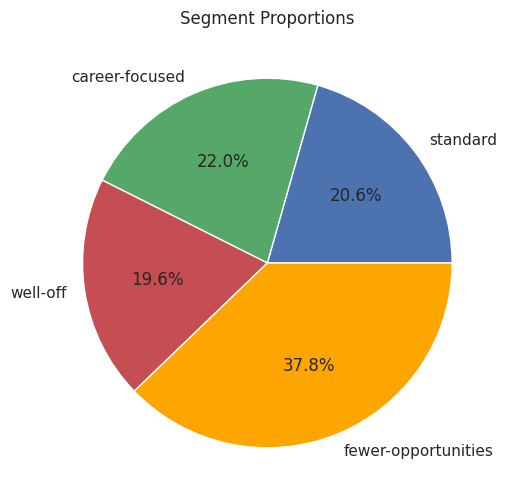

In [394]:
plt.figure(figsize=(9,6))
plt.pie(segm_proportions['Segment Proportions'],
        labels=['standard','career-focused','well-off','fewer-opportunities'],
        autopct='%1.1f%%',
        colors=['b','g','r','orange'])
plt.title('Segment Proportions')
plt.show()

# **Purchase Occasion and Purchase Incidence**


## 1) How often does people from different segments visit the store?
## 2) How often do they buy chocolate candy bars?
## 3) How often do they buy relative to the number of their store visits?

In [395]:
segments_mean = df_purchase_descrp.groupby(['Segments']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segments,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,117.295918,34.602041,0.284478
3.0,113.730159,22.756614,0.201588


In [396]:
segments_std = df_purchase_descrp.groupby(['Segments']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segments,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,20.716152,25.900579,0.171787
3.0,16.410498,13.815040,0.120335


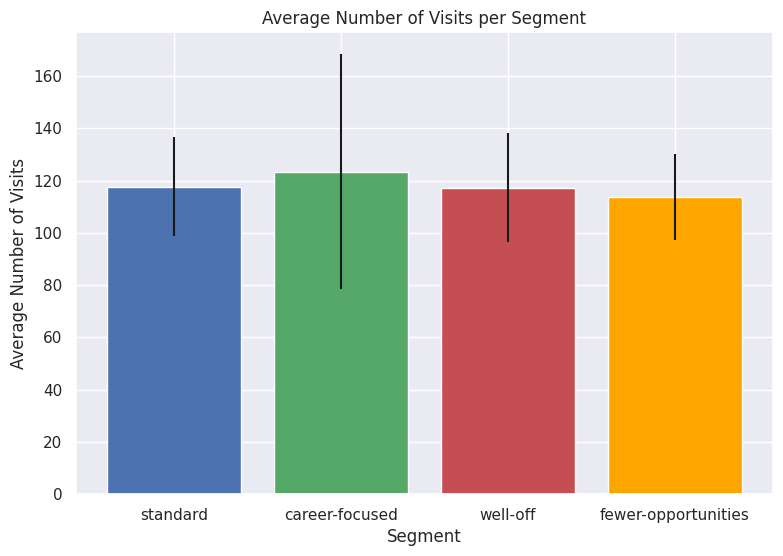

In [397]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
        tick_label=['standard','career-focused','well-off','fewer-opportunities'],
        height=segments_mean['N_Visits'],
        yerr=segments_std['N_Visits'],
        color=('b','g','r','orange'))
plt.title('Average Number of Visits per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Number of Visits')
plt.show()

# Findings:-
## more visits by career-focused segment but they are very random
## but the number of visits by the other three segments are more or less the same

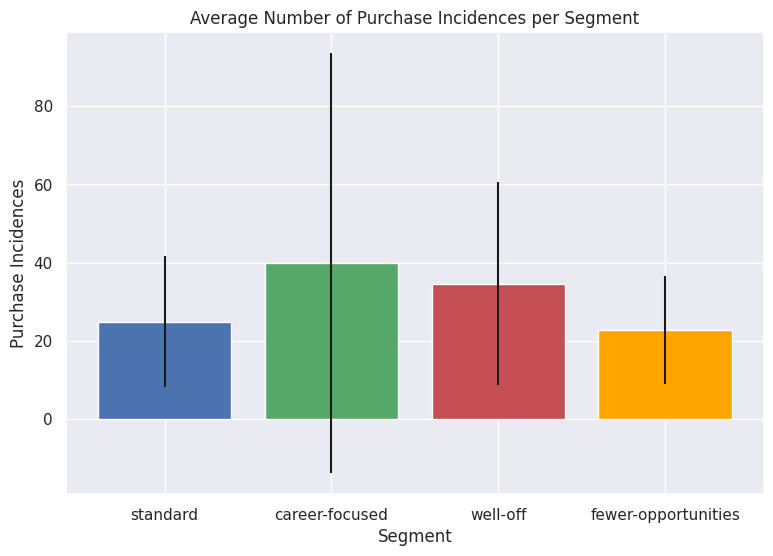

In [398]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
        tick_label=['standard','career-focused','well-off','fewer-opportunities'],
        height=segments_mean['N_Purchases'],
        yerr=segments_std['N_Purchases'],
        color=('b','g','r','orange'))
plt.title('Average Number of Purchase Incidences per Segment')
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.show()

# Findings
## 1) A part of the career-focused segment might buy the product and the other part less so - although similar income level the way they spend money might differ
## 2) the standard and fewer opportunities segments looks more stable in comparison

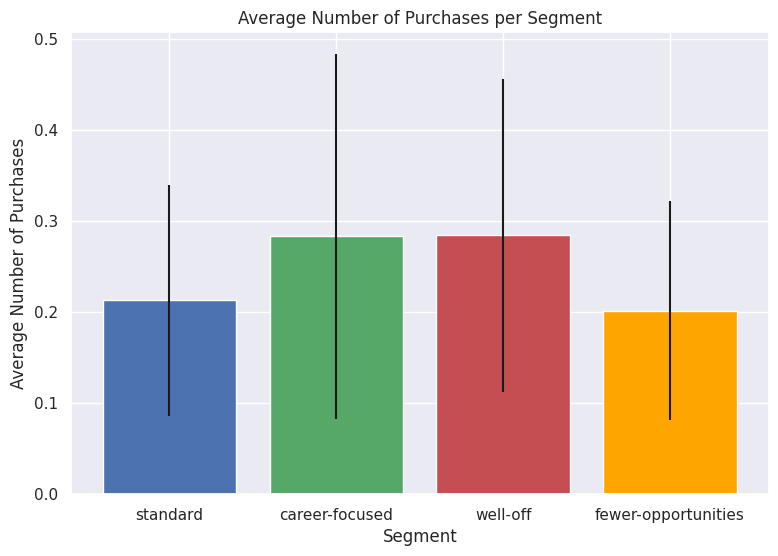

In [399]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
        tick_label=['standard','career-focused','well-off','fewer-opportunities'],
        height=segments_mean['Average_N_Purchases'],
        yerr=segments_std['Average_N_Purchases'],
        color=('b','g','r','orange'))
plt.title('Average Number of Purchases per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Number of Purchases')
plt.show()

# **Brand Choice**

In [400]:
# Select only rows where incidence is one.
# In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [401]:
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,3
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,3
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,3
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,3
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,3
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,3
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,3
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,3


In [402]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segments'], brand_dummies['ID'] = df_purchase_incidence['Segments'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segments,ID
6,False,True,False,False,False,3,200000001
11,False,False,False,False,True,3,200000001
19,True,False,False,False,False,3,200000001
24,False,False,False,True,False,3,200000001
29,False,True,False,False,False,3,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,3,200000500
58648,True,False,False,False,False,3,200000500
58674,False,True,False,False,False,3,200000500
58687,False,True,False,False,False,3,200000500


In [403]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [404]:
mean_brand_choice = temp.groupby(['Segments'], as_index = True).mean()

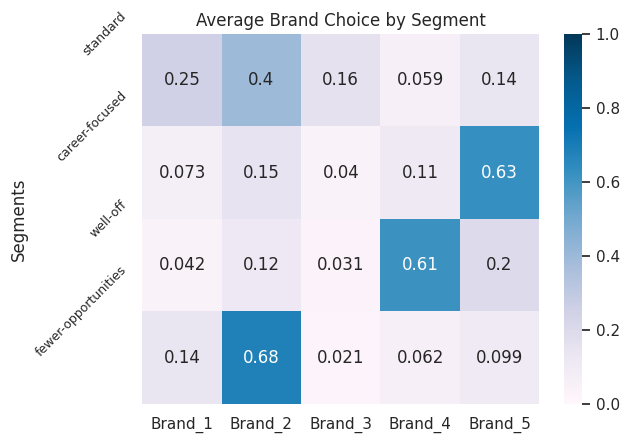

In [405]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['standard','career-focused','well-off','fewer-opportunities'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

# **Revenue**

### Data collected such that only one brand is bought at that time of transaction

In [406]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased,
# we multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segments', 'Revenue Brand 1']] = temp[['Segments', 'Revenue Brand 1']].groupby(['Segments'], as_index = False).sum()
segments_brand_revenue

<ipython-input-406-b58a9c08ab51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


,Segments,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,699.47
3,3,2258.90


In [407]:
# Compute revenue for brand 2.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segments', 'Revenue Brand 2']] = temp[['Segments', 'Revenue Brand 2']].groupby(['Segments'], as_index = False).sum()

<ipython-input-407-5c05fb7fe97d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


In [408]:
# Compute revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 3']] = temp[['Revenue Brand 3','Segments']].groupby(['Segments'], as_index = False).sum()

<ipython-input-408-3a3e0ef8d895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']


In [409]:
# Compute revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 4']] = temp[['Revenue Brand 4','Segments']].groupby(['Segments'], as_index = False).sum()

<ipython-input-409-30b19bf2fabb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']


In [410]:
# Compute revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 5']] = temp[['Revenue Brand 5','Segments']].groupby(['Segments'], as_index = False).sum()

<ipython-input-410-b9d5f49867ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']


In [411]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segments,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,699.47,1298.23,731.35,14185.57,5509.69,22424.31
3,3,2258.90,13955.14,716.25,1629.31,2230.50,20790.10


In [412]:
segments_brand_revenue['Segment Proportions'] = segm_proportions['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segments'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Well-Off',
                                                                           3:'Fewer-Opportunities'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segments'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions,Segment
Segments,,,,,,,,
0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206,Standard
1,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220,Career-Focused
2,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196,Well-Off
3,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378,Fewer-Opportunities


### Brand3 can reduce its price to potentially influence standard segment
### Brand4 can increase its price as it has a loyal base who are not concerned about the money - likely retain more customers and increase revenue per sale